Name: Sonam Rinzin Gurung <br>
University ID: 2059524

# Classification Task

---


### Logistic Regeression (Binary)

Logistic regression is a classification algorithm that predicts the probability of a categorical dependent variable. The dependent variable is binary in nature where 1 denotes yes, success and 0 denotes no, failure.


---




### NBA Players Career Duration Prediction

The first step is to import necessary python libraries into this notebook

In [1]:
#importing necessary libraries

#numpy allows us to calculate mathematical equations and problems
import numpy as np  

#pandas is a open source data analysis and manipulation library
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Uploading the dataset file into this colab notebook. Storing the file in uploaded variable

In [2]:
from google.colab import files

uploaded = files.upload()

Saving nba-players.csv to nba-players.csv


Reading the csv file that we uploaded earlier. Pandas is used here to read the csv file and save it in the dataframe nbadf

In [3]:
import io
nbadf = pd.read_csv(io.BytesIO(uploaded['nba-players.csv']))

# Dataset Description
The dataset contains NBA players' rookie season stats.<br>National Basketball Association <b>NBA</b> is a professional basketball league based in North America. This league has 30 teams and two conferences (West and East). In a single season there are 81 games. The regular season is followed by the playoffs where eight teams in each conferences duel in a 7 game series to reach to the finals where the champions from each conference battle in another 7 game series to win the Larry O'Brien Trophy and become the world champions.<br><br>
NBA is a very statistically driven league and so is basketball in general.
In such a statistical sport, the success of a rookie (1st year) player can be predicted by analysing their rookie year stats. Player stats are the basis through which team managers and owners decide whether to give certain players contract extensions or not. Hence, by applying machine learning algorithms such as Logistic Regression to their stats we can predict if a player will last for 5 years or not.


In [4]:
#displaying the top 4 rows in our dataset
nbadf.head() 

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


Removing the first column called Unnamed. It is not required for our model.


In [5]:
# using the iloc function to remove the first column from our dataframe
# iloc selects the specified range of cells from the dataframe
#[:,1] means select all the columns except the first one
nbadf = nbadf.iloc[:,1:]  
nbadf 

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


The updated dataframe has 1340 rows and 21 columns.<br>
As observed below, non of the rows have null value. All the columns except for name is either float or int. So there is no need to map any object data to integer or float.  

In [6]:
#display information about the dataframe
nbadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

# Data Description

## Independent Variables / Features


1. **name** : Name of the player
2. **gp**   : number of games played  
3. **min**  : average minutes played per game  
4. **pts**  : amount of points scored per game
5. **fgm**  : field goals made / no. of made baskets per game
6. **fga**  : field goals attempted / no. of baskets attempted per game
7. **fg**   : field goal made percentage [fgm/fga]
8. **3p_made** : number of made 3 point field goals per game [For a field goal to be 3 points the shooter has to shoot from beyond the 3 point line]
9. **3pa** : number of 3 point field goals attempted per game
10. **3p** : 3 point field goal made percentage [3p_made/3pa]
11. **ftm** : free throws made | no of made free throws per game
12. **fta** : free throws attempted per game
13. **ft** : free throw made percentage [ftm/fta]
14. **oreb** : number of offensive rebounds secured per game | A rebound is offensive if it is grabbed while attacking
15. **dreb** : number of defensive rebounds secured per game | A rebound is defensive when it is grabbed while defending
16. **reb** : total number of rebounds secured per game
17.  **ast** :  number of assists per game | Assist is the pass leading directly to a score
18. **stl** :  number of steals per game | When a denfesive player steal the ball from an offensive player
19. **blk** : number of blocks per game | When a defender blocks shot attempt of an offensive player
20.  **tov** : number of turnover commited per game | when an offensive player loses possession of the ball

## Target Variable / Dependent Variable
**target_5yrs** : has the player played more than 5 yeras in the NBA or not (binary: “1” means “Yes”, “0” means “No”)


---



Checking if there are duplicate data in the rows

In [7]:
#duplicated() returns a boolean series denoting duplicate rows
#using sum function to see amount of duplicate rows 
nbadf.name.duplicated().sum()

46

In [8]:
# ~ symbol is used to view the amount of non duplicate rows
(~nbadf.name.duplicated()).sum()

1294

This dataset has 46 duplicate rows and 1294 unique rows. <br>
Removing the duplicate rows using drop_duplicates function

In [9]:
#drop_duplicates() has two parameters:
#subset = which column to consider to check for duplicates
#keep = which occurence to keep (last) would delete all the occurences except for the last one
#inplace = if True, then duplicate rows will be deleted from the dataframe and return the same dataframe with duplicates deleted 
nbadf.drop_duplicates(subset='name',keep='last',inplace=True)
nbadf

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


### Effective Field Goal
In basketball there are two types of field goals, 2 points and three points. A three point is worth more than 2. So, a 3 point field goal carries more weight. The Effective Field Goal Percentage (eFG%) is a stat used to take into consideration the additional difficulty of three-point shots and the extra points awarded for making a three-pointer. <br>
eFG% = (FGM + 1.5 * 3ptFGM) /FGA

In [10]:
#calculating the effective field goal percentage and adding it to the dataframe
#efg = (fgm + 1.5*3p_made)/fga
nbadf['efg'] = (nbadf['fgm'] + (1.5* nbadf['3p_made']))/nbadf['fga']
nbadf['efg']= round((nbadf['efg'] * 100),1)

### Assit to TurnOver Ratio
This stat takes a player's total assists per game and divides them by their turnovers per game. If the ratio is more than one it indicates that the player is efficient with the ball and contributes well to the scoring of the team. If the ratio is less than one then it indicates that a player is not good with handling the ball and contributes less in providing scoring opportunities for the team.<br>
Assist-turnover = ast/tov

In [11]:
#calculating the assist to turnover ratio for each player and adding it to the dataframe
nbadf['ast:tov'] = round((nbadf['ast']/nbadf['tov']),1)
nbadf

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,efg,ast:tov
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,44.1,1.5
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,45.5,2.3
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,55.3,1.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,44.5,0.8
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,53.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,44.4,3.1
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1,40.2,1.8
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,56.4,0.3
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1,44.7,2.8


# Data Analysis

### Checking the distribution between the number of players who have played for 5 or more years and players who have played less than 5 years

In [12]:
targetDistribution = nbadf.target_5yrs.value_counts()
print(targetDistribution)

1    805
0    489
Name: target_5yrs, dtype: int64


Played for 5 or more years = 805 players <br>
Played for less than 5 years = 489 players

---
Visualizing the distribution of the target varable


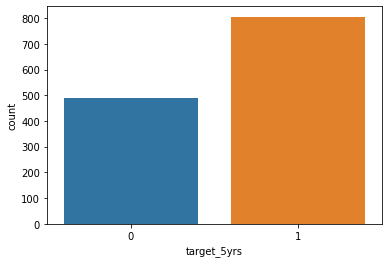

In [13]:
#countplot from seaborn library counts the observations in each categorical bin using bars
sns.countplot(x = 'target_5yrs',data = nbadf)

Visualizing the distribution of target variable with a pie chart along with percentage



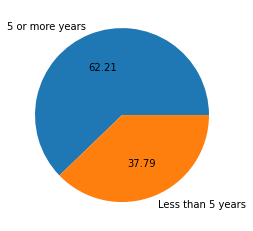

In [14]:
#using pie from matplot library
mylabels = ["5 or more years","Less than 5 years"]
plt.pie(targetDistribution,labels=mylabels,autopct = '%.2f') # autopct generates a automatic percentage of the distribution
plt.show()

Spliting the dataframe into Players who have played for more than 5 years and players who have played for less than 5 years. Then viewing their statistic summary such as mean, std, etc.

In [15]:
#selecting from the dataframe where players have played for less than 5 years
lessThanFiveYrs = nbadf[nbadf['target_5yrs']==0]
#selecting from the dataframe where players have played for 5 or more years
moreThanFiveYrs = nbadf[nbadf['target_5yrs']==1]

#using describe() function to view the statistic summary of the dataframe
descLess = round(lessThanFiveYrs.describe(),2)
descMore= round(moreThanFiveYrs.describe(),2)

#concating the two dataframes into one
pd.concat([descLess,descMore],axis=1,keys=['Description:Played Less than 5 years','Description: Played More than five years'])


Description:Played Less than 5 years          ... Description: Played More than five years        
                                        gp     min  ...                                      efg ast:tov
count                               489.00  489.00  ...                                   805.00  805.00
mean                                 51.07   14.07  ...                                    50.78    1.23
std                                  16.75    6.37  ...                                     7.64    0.72
min                                  11.00    3.10  ...                                    31.20    0.00
25%                                  39.00    9.40  ...                                    45.80    0.70
50%                                  51.00   12.70  ...                                    49.70    1.10
75%                                  64.00   17.30  ...                                    54.30    1.70
max                                  82.00   35.40  ...                                    82.00    4.60

[8 rows x 44 columns]

### Checking the correlation between the variables in the dataframer<br>
Correlation is used to find relationship between different variables in the dataframe. The statistical relationship between two variables is referred to as their correlation. <br><br>
A positive correlation means the variables move in the same direction. <br>
A negative correlation means that the two variables are inversely related.<br> A neutral correlation means that the two variables have no relationship.<br>


In [16]:
#finding the correlation using the corr() function
#corr() function displays a correlation matrix of the dataframe
coRel = round(nbadf.corr(),1)
coRel

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,efg,ast:tov
gp,1.0,0.6,0.5,0.5,0.5,0.3,0.1,0.1,0.0,0.5,0.5,0.2,0.4,0.5,0.5,0.4,0.5,0.3,0.5,0.4,0.1,0.1
min,0.6,1.0,0.9,0.9,0.9,0.2,0.4,0.4,0.2,0.8,0.8,0.2,0.6,0.7,0.7,0.6,0.8,0.4,0.8,0.3,0.2,0.2
pts,0.5,0.9,1.0,1.0,1.0,0.3,0.4,0.4,0.2,0.9,0.9,0.3,0.6,0.7,0.7,0.6,0.7,0.4,0.9,0.3,0.2,0.1
fgm,0.5,0.9,1.0,1.0,1.0,0.3,0.3,0.3,0.1,0.8,0.8,0.2,0.6,0.7,0.7,0.5,0.7,0.4,0.8,0.3,0.2,0.0
fga,0.5,0.9,1.0,1.0,1.0,0.1,0.4,0.4,0.2,0.8,0.8,0.3,0.5,0.6,0.6,0.6,0.7,0.3,0.8,0.3,0.1,0.1
fg,0.3,0.2,0.3,0.3,0.1,1.0,-0.3,-0.3,-0.3,0.2,0.3,-0.2,0.5,0.4,0.5,-0.1,0.1,0.4,0.1,0.2,0.3,-0.3
3p_made,0.1,0.4,0.4,0.3,0.4,-0.3,1.0,1.0,0.6,0.2,0.1,0.3,-0.2,0.0,-0.1,0.4,0.3,-0.2,0.3,0.0,0.6,0.3
3pa,0.1,0.4,0.4,0.3,0.4,-0.3,1.0,1.0,0.6,0.2,0.1,0.3,-0.2,0.0,-0.1,0.4,0.3,-0.2,0.3,0.0,0.6,0.4
3p,0.0,0.2,0.2,0.1,0.2,-0.3,0.6,0.6,1.0,0.0,-0.0,0.3,-0.3,-0.1,-0.2,0.3,0.2,-0.2,0.1,-0.0,0.4,0.4
ftm,0.5,0.8,0.9,0.8,0.8,0.2,0.2,0.2,0.0,1.0,1.0,0.3,0.6,0.6,0.6,0.5,0.6,0.4,0.8,0.3,0.0,-0.0


Visualizing the correlation matrix using heatmap

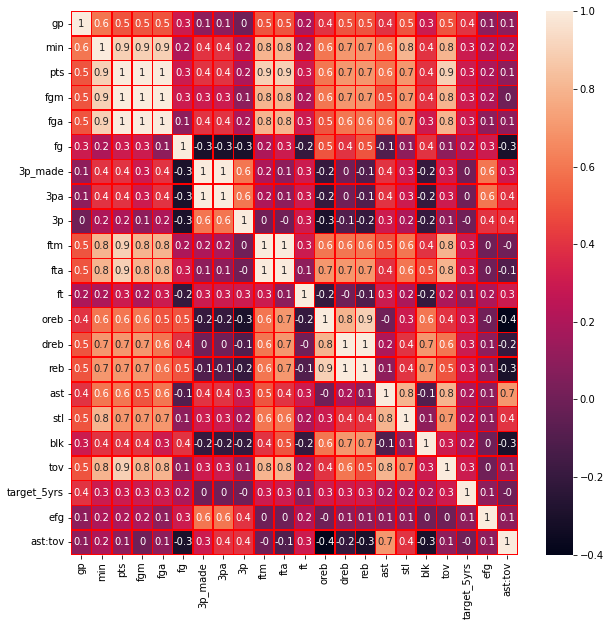

In [17]:
#plotting the correlation into a heatmap using sns heatmap
plt.figure(figsize = (10,10))
sns.heatmap(coRel,annot=True,linewidths=0.5,linecolor="red")
plt.show()

Plotting the Kernel Distribution Estimation plot (kdeplot) of field goal attempts of players that have played 5 or more years and players that have played less than 5 years separately in one graph.<br>
Kernel Distribution Estimation plot is used to display the probability density function of given continuous data variable.

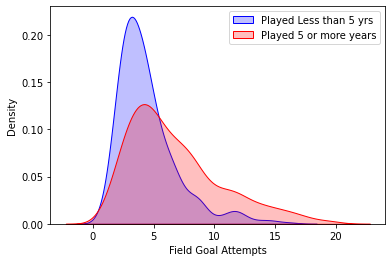

In [18]:
#plotting the kdeplot for players that have played less than 5 years
sns.kdeplot(nbadf['fga'][nbadf['target_5yrs']==0],color='blue',fill=True)

#plotting the kdeplot for players that have played 5 or more years
sns.kdeplot(nbadf['fga'][nbadf['target_5yrs']==1],color='red',fill=True)

plt.xlabel("Field Goal Attempts")
plt.legend(['Played Less than 5 yrs','Played 5 or more years'])
plt.show()

From above depiction, we can see that the probability density function of field goal attempts of players playing less than 5 years is high in the range of 0-8 field goals attempts. For players that have played 5 or more years, the probability density is more spread out with more total field goal attempts.

---



Scoring points is the most important part of basketball. Hence, viewing the top scorers and comparing them to lower level players.

In [19]:
# creating a dataframe called top_scorers
#selecting players who have played more than 30 mins per game and scored more than 20 points per game
#data of these players are copied and saved in the top_scorers dataframe
top_scorers = nbadf[(nbadf['min'] > 30) & (nbadf['pts'] > 20)].copy()

#sorting the dataframe in descending order in terms of points scored
top_scorers.sort_values(by = 'pts', ascending = False)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,efg,ast:tov
352,Michael Jordan*,82,38.3,28.2,10.2,19.8,51.5,0.1,0.6,17.3,7.7,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,1,52.3,1.7
118,David Robinson*,82,36.6,24.3,8.4,15.9,53.1,0.0,0.0,0.0,7.5,10.2,73.2,3.7,8.3,12.0,2.0,1.7,3.9,3.1,1,52.8,0.6
442,Terry Cummings,70,36.2,23.7,9.8,18.7,52.3,0.0,0.0,0.0,4.2,5.9,70.9,4.3,6.3,10.6,2.5,1.8,0.9,2.9,1,52.4,0.9
1157,Allen Iverson*,76,40.1,23.5,8.2,19.8,41.6,2.0,6.0,34.1,5.0,7.2,70.2,1.5,2.6,4.1,7.5,2.1,0.3,4.4,1,56.6,1.7
1308,Shaquille O'Neal*,81,37.9,23.4,9.0,16.1,56.2,0.0,0.0,0.0,5.3,8.9,59.2,4.2,9.6,13.9,1.9,0.7,3.5,3.8,1,55.9,0.5
272,Ron Harper,82,37.4,22.9,9.0,19.7,45.5,0.2,1.1,21.3,4.7,6.9,68.4,2.1,2.7,4.8,4.8,2.5,1.0,4.2,1,47.2,1.1
666,Blake Griffin,82,38.0,22.5,8.5,16.8,50.6,0.1,0.3,29.2,5.4,8.5,64.2,3.3,8.8,12.1,3.8,0.8,0.6,2.7,1,51.5,1.4
181,Mitch Richmond*,79,34.4,22.0,8.2,17.5,46.8,0.4,1.1,36.7,5.2,6.4,81.0,2.0,3.9,5.9,4.2,1.0,0.2,3.4,1,50.3,1.2
1230,Glenn Robinson,80,37.0,21.9,8.0,17.6,45.1,1.1,3.4,32.1,5.0,6.2,79.6,2.1,4.3,6.4,2.5,1.4,0.3,3.9,1,54.8,0.6
490,Kelly Tripucka,82,37.5,21.6,7.8,15.6,49.6,0.1,0.3,22.7,6.0,7.6,79.7,2.7,2.7,5.4,3.3,1.1,0.2,3.4,1,51.0,1.0


From the above table we can observe that players who score more naturally play more minutes and games. All the top scorers have played more than 5 years in the league.

---



Plotting a scatter plot to view the relationship between points scored per game and minutes played per game by top players and regular players.<br>
Scatter plots are used to observe and show relationships between two numeric variables. The dots in scatter plot shows a pattern for a whole data.

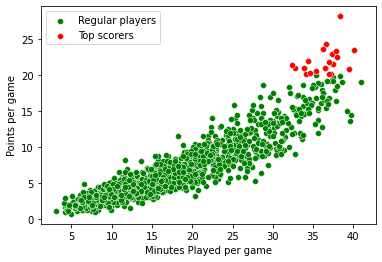

In [20]:
#using seaborn library to plot a scatter plot

#taking data from our dataframe nbadf
#x axis is minutes per game 
#y axis is points scored per game
sns.scatterplot(
    data = nbadf,
    x = 'min',
    y = 'pts',
    color = 'green',
)

#taking data from our top players dataframe top_scorers
#x axis is minutes per game 
#y axis is points scored per game
sns.scatterplot(
    data = top_scorers,
    x = 'min',
    y = 'pts',
    color = 'red'
)
plt.xlabel("Minutes Played per game")
plt.ylabel("Points per game")
plt.legend(["Regular players","Top scorers"])
plt.show()

Field Goal Percentage Distrubution<br>
Distributing field goal percentage of players to observe the level of shooting of players 

In [21]:
#creating a dictionary called fieldgoal to store diffent groups of field goal percentages
fieldGoal = {}

#field goals greater or equal to 50%
fieldGoal['Field Goal greater or equal to 50 %'] = len([i for i in nbadf.fg if i >= 50])
#field goals 35% or greater to less than 50%
fieldGoal['Field goal pct: 35-50 %'] = len([i for i in nbadf.fg if (35 <= i) and (i < 50)])
#field goals less than 35% 
fieldGoal['Less than 35% fg'] = len([i for i in nbadf.fg if i < 35])

fieldGoal

{'Field Goal greater or equal to 50 %': 208,
 'Field goal pct: 35-50 %': 1019,
 'Less than 35% fg': 67}

Depicting the above proportions of field goal percentages in a pie chart to visualize the distribution more clearly.<br>
We can observe that most players have field goal percentage between 35-50% and very few players have fg% less than 35%.

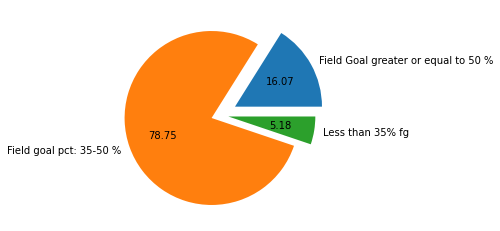

In [22]:
#using pie plot
#the data used is the values of the fieldgoal dictionary
#autopct generates percentage of the distribution
#explodes separates the differnt proportions of the pie
plt.pie(x=fieldGoal.values(),labels = fieldGoal.keys(),autopct="%.2f",explode=(0.2,0.1,0.1))
plt.show()

Free Throw Percentage Distrubution<br>
Distributing the free throw percentage of players to observe the level of  freethow shooting of players.

In [23]:
#creating an empty dictionary
freeThrowPer = {}

#free throw percentage greater or equal to 85%
freeThrowPer['FT% > 85%'] = len([k for k in nbadf.ft if k >= 85])

#free throw percentage between 65-85%
freeThrowPer['FT%: 65-85 %'] = len([k for k in nbadf.ft if (k>=65) & (k < 85)])

#free throw percentage between 50-65%
freeThrowPer['FT%: 50-65 %'] = len([k for k in nbadf.ft if (k>=50) & (k<65)])

#free throw percentage less than 50%
freeThrowPer['FT% < 50 %'] = len([k for k in nbadf.ft if (k<50)])

freeThrowPer

{'FT% < 50 %': 46, 'FT% > 85%': 69, 'FT%: 50-65 %': 287, 'FT%: 65-85 %': 892}

Depicting the above proportions of free throw percentages in a pie chart to visualize the distribution more clearly.<br>
We can observe that most players have free throw percentage between 65-85%<br>
It is rare to have free throw percentage less than 50% and more than 85%

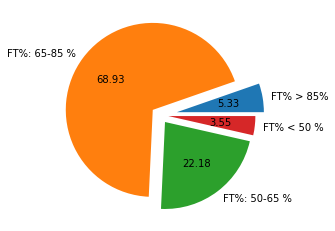

In [24]:
#using pie plot
#the data used is the values of the freeThrowPer dictionary

plt.pie(x=freeThrowPer.values(),labels = freeThrowPer.keys(),autopct="%.2f",explode=(0.2,0.1,0.1,0.1))
plt.show()



---


# Logistic Regression model


## Separating the data into independent variables and dependent varables
X = independent variable / features <br>
Y = dependent variable / target variable

In [25]:
# X is the independent variable where all data from all the columns of the dataframe is 
#included except for name and target_5yrs columns 
X = nbadf.drop(columns = ['target_5yrs','name'])

#Y is the dependent variable containg the data from target_5yrs column of the dataframe
Y = nbadf['target_5yrs']
print(X.head())
print("--------------------------------------------------")
print(Y.head())

   gp   min  pts  fgm  fga    fg  ...  ast  stl  blk  tov   efg  ast:tov
0  36  27.4  7.4  2.6  7.6  34.7  ...  1.9  0.4  0.4  1.3  44.1      1.5
1  35  26.9  7.2  2.0  6.7  29.6  ...  3.7  1.1  0.5  1.6  45.5      2.3
2  74  15.3  5.2  2.0  4.7  42.2  ...  1.0  0.5  0.3  1.0  55.3      1.0
3  58  11.6  5.7  2.3  5.5  42.6  ...  0.8  0.6  0.1  1.0  44.5      0.8
4  48  11.5  4.5  1.6  3.0  52.4  ...  0.3  0.3  0.4  0.8  53.3      0.4

[5 rows x 21 columns]
--------------------------------------------------
0    0
1    0
2    0
3    1
4    1
Name: target_5yrs, dtype: int64


# Data Pre-Processing

## Scaling the independent variables in X
StandardScalar() function normalizes the independent variable in such a way that each column of the independent variable(X) will have mean (μ) = 0 and standard deviation(σ) = 1 <br>
This process replaces all the values in independent variable(X) with their repective Z score.<br>
z = (x-μ)/σ <br><br>
This process is done to normalize the data within a particular range. It helps to speed up the models' data processing time and also helps to improve accuracy of the model.

In [26]:
#importing StandardScalar from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
#the scaled independent varable is saved in x_scaled array
x_scaled = scale.fit_transform(X)
x_scaled

array([[-1.40116106,  1.18124655,  0.14062698, ...,  0.15407976,
        -0.77624916,  0.36596493],
       [-1.4586414 ,  1.12092131,  0.09452912, ...,  0.57003081,
        -0.60206999,  1.47241032],
       [ 0.78309192, -0.2786243 , -0.36644952, ..., -0.26187129,
         0.61718423, -0.32556343],
       ...,
       [-0.99879867, -0.66470584, -0.32035165, ..., -0.40052165,
         0.7540393 , -1.29370314],
       [-0.4814756 , -0.67677089, -0.52779204, ..., -0.539172  ,
        -0.70160095,  2.16393869],
       [-0.7688773 , -0.71296603, -0.55084097, ..., -0.40052165,
        -0.04220836,  0.50427061]])

In [27]:
#checking the mean of each column of the independent variable(X)
x_scaled.mean(axis=0)

# the mean each column of X is very close to zero

array([-4.94195102e-17, -9.88390204e-17,  2.30624381e-16, -8.92296712e-17,
        5.49105669e-17,  8.23658504e-17, -2.19642268e-17, -4.39284535e-17,
        2.19642268e-17,  8.51113787e-17,  1.59240644e-16,  7.93457692e-16,
       -5.49105669e-18, -2.19642268e-17,  2.19642268e-17,  1.37276417e-17,
        7.68747937e-17,  7.13837370e-17,  1.07075605e-16,  1.09821134e-16,
       -3.15735760e-17])

In [28]:
#checking the standard deviation of each column of the independent variable(X)
x_scaled.std(axis=0)

# the SD of each column of X is 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

## Splitting Data
Splitting the dependent and independent variables into training and testing sets.<br>
This is done to understand the models' performance. We can train the model by using the training set and test the model by using the testing set.<br>
To split the data we use train_test_split function from sklearn library.

In [29]:
#importing train_test_split()
from sklearn.model_selection import train_test_split

#separating the data into X_train, X_test, Y_train, Y_test sets
# **parameters explained**
#test_size = size of the testing set, here test size is 0.25 meaning 25% of the total data will taken as testing set
#testing size is 25%, so training size is naturally 75%
#random_state = defines the randomness of split in the data ,if random_state is not specified, then each time the code is run, the data in the splits would change
#stratify parameter makes a split so that the proportion of values in the split will be the same as the proportion of values provided to the parameter stratify

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=0.25, random_state = 42,stratify=Y)


In [30]:
#checking the shape of the four splits
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",Y_train.shape)
print("Y_test: ",Y_test.shape)

X_train:  (970, 21)
X_test:  (324, 21)
Y_train:  (970,)
Y_test:  (324,)


## Model Development and Prediction
Using LogisticRegression function from sklearn to build the model by fitting the model with X_train and Y_train <br><br>
Scikit Learn is one of the most popular python library for machine learning due to its robust nature and easy functionality. It is a great medium for begineers to learn machine learning in python. Sckikit learn has various classification, regression and clustering algorithms that are bulit in and easy to use.

In [31]:
#importing LogisticRegression from linear_model of sklearn library
from sklearn.linear_model import LogisticRegression

#using the default parameters of LogisticRegression() in our model logReg
logReg = LogisticRegression()

#fitting the model with X_train and Y_train data
logReg.fit(X_train,Y_train)

#calculating the  hypothesis of our model i.e. y(predicted)
y_predicted = logReg.predict(X_test)


#predict_proba returns a 2d array of the probabilities for the target (0 and 1)
# there are two colums , left column is the probability of 0 and right is probability of 1

predicted_proba = logReg.predict_proba(X_test)

### Logistic Regression Methodology
We know, <br>
y = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ
Where, y is dependent variable and x1, x2 ... and Xr are independent variables<br>𝑏₀, 𝑏₁, …, 𝑏ᵣ are the predicted weights or just coefficients
<br><br>
The logistic regression function 𝑝(𝐱) is the sigmoid function of y: 𝑝(𝐱) = 1 / (1 + exp(−y).<br>
p(x) is often close to either 0 or 1. The function 𝑝(𝐱) is interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

In [33]:
#y = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ 

pred_weights= logReg.coef_
bias = logReg.intercept_

print("Coefficients of equation: ",pred_weights)
print("\nIntercept: ",bias)

Coefficients of equation:  [[ 0.61829079 -0.78470131  0.27387825  0.13885425  0.1080401   0.07076095
   0.83172671 -0.84256384  0.08994333  0.3196421  -0.07886552  0.13489273
   0.43774285 -0.23109662  0.48199626  0.72266905  0.0240032   0.29120522
  -0.43115378  0.02334323 -0.07568238]]

Intercept:  [0.68571196]


# Evaluating The Classification Model
There are various ways we can check the accuracy of the model.

In [34]:
#using score function to calculate the accuracy score of the model
print("Training data Accuracy Score: ",logReg.score(X_train,Y_train))
print("Testing data  Accuracy Score: ",logReg.score(X_test,Y_test))

Training data Accuracy Score:  0.709278350515464
Testing data  Accuracy Score:  0.7685185185185185


## Confusion Matrix
Confusion matrix is a matrix that summarizes the performance of the model.<br>
Confuion matrix for binary classification is a 2x2 matrix. Where the main diagonal elements represent correct prediction and the other diagonal represents incorrect predictions.<br>
### Understanding True Positive, True Negative, False Positive and False Negative in a Confusion Matrix
True Positive (TP): The actual value was positive and the model predicted a positive value<br>
True Negative (TN): The actual value was negative and the model predicted a negative value<br>
False Positive (FP): The actual value was negative but the model predicted a positive value<br>
False Negative (FN): The actual value was positive but the model predicted a negative value<br><br>
In confusion matrix of sklearn,<br>
top left element = true negative<br>
bottom left element = false negative<br>
top right element = false positive<br>
bottom right element = true positive<br>

In [35]:
#confusion matrix can be plotted using confusion_matrix of sklearn.metrics
from sklearn.metrics import confusion_matrix

#created a confuion matrix called confM using the Y_test and predicted Y
confM = confusion_matrix(Y_test,y_predicted)
confM

array([[ 76,  46],
       [ 29, 173]])

From above confuion matrix, we can observe that our model has predicted 76 negative values correctly, 29 negative values incorrectly, 173 positive values correctly and 46 positive values incorrectly.


---

Visualizing the confuion matrix using heatmap for easier understanding.

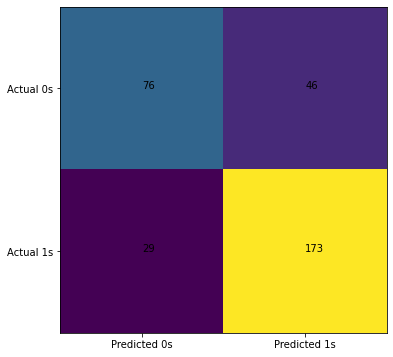

In [36]:
# using the imshow function of matplot to plot a heatmap of the confusion matrix
fig, axis = plt.subplots(figsize=(6, 6)) # creating a subplot for our figure, axis contains the heatmap
axis.imshow(confM)
axis.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s')) # labeling the figure
axis.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        axis.text(j, i, confM[i, j])  #inserting the values of the confusion matrix into the heatmap plot
plt.show()

**Accuracy**: It is the ratio of correctly predicted observations to the total observations. Accuracy = (TP + TN) / (TP + FP + FN + TP) <br>
**Precision**: It is the ratio of correctly predicted positive observations to the total predicted positive observations. Precision = TP / (TP + FP) <br>
**Recall**(Sensitivity): It is the ratio of correctly predicted positive observations to the actual no. of positive observations. Recall = TP / (TP + FN)<br>
**F1 Score**: It is the weighted average of Precision and Recall. F1 Score = 2*(Precison * Recall) / (Precision + Recall)

In [37]:
#accuracy,precision, recall and f1 score can be calculated through sklearn.metrics library functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#print the accuracy,precision, recall and f1 score of this model
print("Accuracy:", accuracy_score(Y_test,y_predicted))
print("Precision:", precision_score(Y_test, y_predicted, ))
print("Recall:", recall_score(Y_test,y_predicted))
print("F1 Score:", f1_score(Y_test,y_predicted))

Accuracy: 0.7685185185185185
Precision: 0.7899543378995434
Recall: 0.8564356435643564
F1 Score: 0.821852731591449


Classification report can also be used to easily observe the accuracy, precision, recall and f1 score of the model.

In [38]:
#using the classification_report function imported from sklearn.metrics library

print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       122
           1       0.79      0.86      0.82       202

    accuracy                           0.77       324
   macro avg       0.76      0.74      0.75       324
weighted avg       0.77      0.77      0.76       324



## AUC-ROC Curve
AUC-ROC curve is the process of calculating the Area Under The Curve (AUC) of Receiver Operating Characteristic (ROC)<br><br>
**The Receiver Operating Characteristic(ROC)** is a evaluation tool for binary classification that plots the true positive rate against the false positive rate, where TPR is on the y-axis and FPR is on the x-axis. <br>
In ROC curve, if the x-axis value is high then it indicates a higher number of False positive than True negative. Higher y-axis value indicates a higher number of true positive than false negative.<br><br>
**The Area Under the Curve(AUC)** is the measure of the ability of the model to distinguish between negative and positive classes.<br>
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.<br>
When AUC = 1, the model is able to perfectly distinguish between all the positive and negative classes.<br>
If, AUC = 0 then the model would predict all negative classes as positive and vice-versa.<br>
When AUC = 0.5 then the classifier model is said to be worthless as it will not be able to distinguish between positive and negative class. 


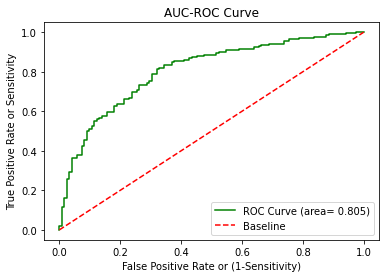

In [39]:
#importing roc_auc_score and roc_curve from sklearn.metrics
from sklearn.metrics import roc_auc_score, roc_curve

#positiveProbability is the probability that a data belongs to the positive class i.e. 1
positiveProbability = predicted_proba[:,1]

#calulating the area of the AUC-ROC curve
auc_score = roc_auc_score(Y_test, positiveProbability)

#the roc_curve function returns the false positive rate(fpr), true positive rate(tpr) and the threshold
fpr, tpr, thresholds = roc_curve(Y_test, positiveProbability)
plt.figure()
#plotting tpr against fpr and also displayig the ROC curve area
plt.plot(fpr, tpr,'g', label='ROC Curve (area= %.3f)' %auc_score) 

# This is the dotted line that represents the ROC curve of a purely random classifier,
# a good classifier stays as far away from this line as possible
plt.plot([0, 1], [0, 1], 'r',linestyle="dashed",label='Baseline')

#inserting labels to the plot
plt.xlabel('False Positive Rate or (1-Sensitivity)')
plt.ylabel('True Positive Rate or Sensitivity')
plt.title('AUC-ROC Curve')
plt.legend(loc=4)
plt.show()


In [40]:
print("The AUC score is ",auc_score)

The AUC score is  0.8046989125142022
